### import library

In [38]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re

### Review some data

In [2]:
path="/Users/thanhtainguyen/Downloads/ikea_products_snapshot_data.csv"
df=pd.read_csv(path)
pd.set_option("max_colwidth", None)
df.head()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,69208026,BESTÅ,Bookcases & shelving units,1725.0,No old price,True,https://www.ikea.com/sa/en/p/besta-storage-combination-with-doors-black-brown-lappviken-sindvik-black-brown-clear-glass-s69208026/,Yes,"Storage combination with doors, 180x42x112 cm",IKEA of Sweden/Marcus Arvonen,42.0,112.0,180.0
1,49306315,PAX,Wardrobes,3222.0,"SR 3,435",True,https://www.ikea.com/sa/en/p/pax-wardrobe-black-brown-uggdal-grey-glass-s49306315/,No,"Wardrobe, 150x66x236 cm",IKEA of Sweden/Ehlén Johansson,66.0,236.0,150.0
2,29277352,ALGOT,Bookcases & shelving units,183.6,SR 266,True,https://www.ikea.com/sa/en/p/algot-wall-upright-shelves-s29277352/,No,"Wall upright/shelves, 66x41/61x197 cm",Francis Cayouette,NaN,197.0,66.0
3,395209,ODDBJÖRG,Chairs,28.0,SR 35,True,https://www.ikea.com/sa/en/p/oddbjoerg-chair-pad-grey-00395209/,No,"Chair pad, 35 cm",IKEA of Sweden,NaN,NaN,NaN
4,70328669,LIXHULT,Cabinets & cupboards,175.0,No old price,True,https://www.ikea.com/sa/en/p/lixhult-cabinet-metal-grey-70328669/,No,"Cabinet, 60x35 cm",Jon Karlsson,35.0,35.0,60.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            369 non-null    int64  
 1   name               369 non-null    object 
 2   category           369 non-null    object 
 3   price              369 non-null    float64
 4   old_price          369 non-null    object 
 5   sellable_online    369 non-null    bool   
 6   link               369 non-null    object 
 7   other_colors       369 non-null    object 
 8   short_description  369 non-null    object 
 9   designer           369 non-null    object 
 10  depth              227 non-null    float64
 11  height             271 non-null    float64
 12  width              312 non-null    float64
dtypes: bool(1), float64(4), int64(1), object(7)
memory usage: 35.1+ KB


#### drop some unneccessary data

In [4]:
df.drop(['item_id'],axis=1,inplace=True)

In [5]:
df['price'].describe().to_frame()

,price
count,369.000000
mean,1094.054472
std,1432.824280
min,3.000000
25%,189.000000
50%,525.000000
75%,1400.000000
max,8380.000000


In [6]:
df.duplicated().sum()

0

In [7]:
df['category'].value_counts().to_frame()

,category
Bookcases & shelving units,62
Tables & desks,56
Chairs,48
Sofas & armchairs,32
Cabinets & cupboards,28
Outdoor furniture,26
Beds,26
Wardrobes,17
Children's furniture,16
TV & media furniture,16


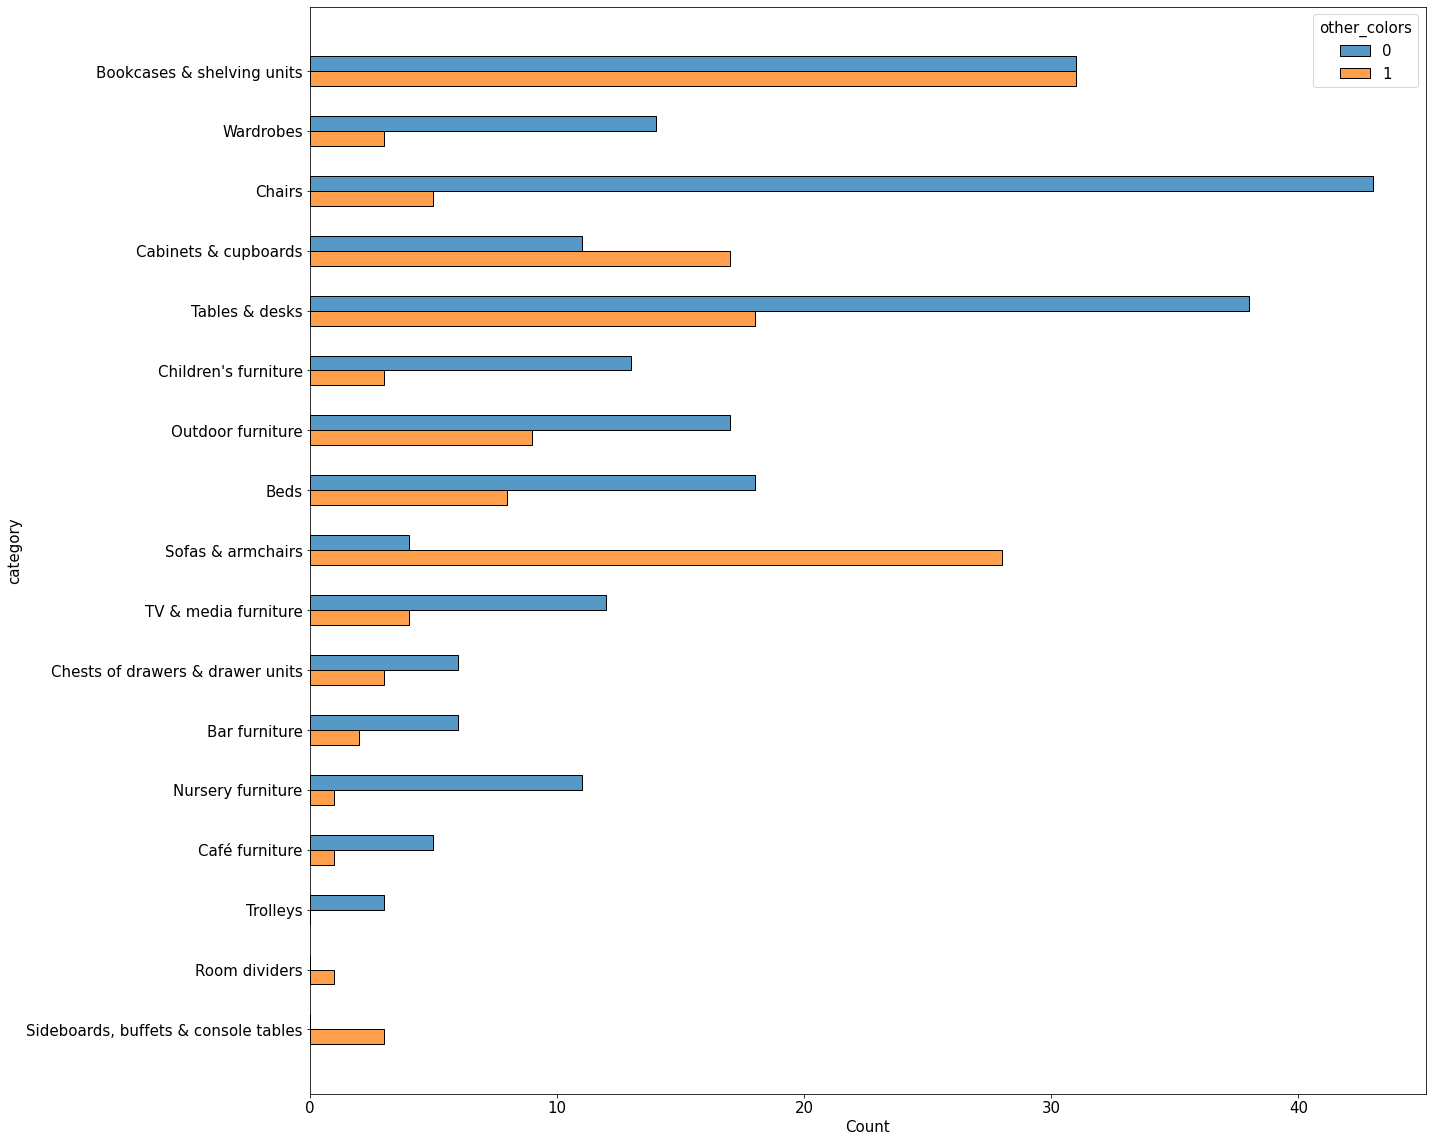

In [30]:
plt.figure(figsize=(20,20))
plt.rcParams.update({'font.size':15})
sns.histplot(data=df,y='category',shrink=0.5,hue='other_colors',multiple='dodge')
plt.show()

In [9]:
df.isna().sum()

name                   0
category               0
price                  0
old_price              0
sellable_online        0
link                   0
other_colors           0
short_description      0
designer               0
depth                142
height                98
width                 57
dtype: int64

In [10]:
df['short_description'].head(10).to_frame()

,short_description
0,"Storage combination with doors, 180x42x112 cm"
1,"Wardrobe, 150x66x236 cm"
2,"Wall upright/shelves, 66x41/61x197 cm"
3,"Chair pad, 35 cm"
4,"Cabinet, 60x35 cm"
5,"Coffee table, 93x93 cm"
6,"Shelving unit with cabinet, 85x40x190 cm"
7,"Wardrobe, 80x50x187 cm"
8,"Table and 4 chairs, 120/180 cm"
9,"Table, outdoor, 71x71x73 cm"


as we can see , some production still have size but its row have some null value . So we could us regex to take the sizes and remove 3 column 'depth','height','width'.

In [11]:
def size(name):
    p=re.findall(r'[0-9]+',name)
    p=list(map(int,p))
    return p
df['size_numerical_list']=df['short_description'].apply(lambda name : size(name))
df.drop(['depth','height','width'],axis=1,inplace=True)
df.head()

,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,size_numerical_list
0,BESTÅ,Bookcases & shelving units,1725.0,No old price,True,https://www.ikea.com/sa/en/p/besta-storage-combination-with-doors-black-brown-lappviken-sindvik-black-brown-clear-glass-s69208026/,Yes,"Storage combination with doors, 180x42x112 cm",IKEA of Sweden/Marcus Arvonen,"[180, 42, 112]"
1,PAX,Wardrobes,3222.0,"SR 3,435",True,https://www.ikea.com/sa/en/p/pax-wardrobe-black-brown-uggdal-grey-glass-s49306315/,No,"Wardrobe, 150x66x236 cm",IKEA of Sweden/Ehlén Johansson,"[150, 66, 236]"
2,ALGOT,Bookcases & shelving units,183.6,SR 266,True,https://www.ikea.com/sa/en/p/algot-wall-upright-shelves-s29277352/,No,"Wall upright/shelves, 66x41/61x197 cm",Francis Cayouette,"[66, 41, 61, 197]"
3,ODDBJÖRG,Chairs,28.0,SR 35,True,https://www.ikea.com/sa/en/p/oddbjoerg-chair-pad-grey-00395209/,No,"Chair pad, 35 cm",IKEA of Sweden,[35]
4,LIXHULT,Cabinets & cupboards,175.0,No old price,True,https://www.ikea.com/sa/en/p/lixhult-cabinet-metal-grey-70328669/,No,"Cabinet, 60x35 cm",Jon Karlsson,"[60, 35]"


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 369 non-null    object 
 1   category             369 non-null    object 
 2   price                369 non-null    float64
 3   old_price            369 non-null    object 
 4   sellable_online      369 non-null    bool   
 5   link                 369 non-null    object 
 6   other_colors         369 non-null    object 
 7   short_description    369 non-null    object 
 8   designer             369 non-null    object 
 9   size_numerical_list  369 non-null    object 
dtypes: bool(1), float64(1), object(8)
memory usage: 26.4+ KB


In [13]:
df.sellable_online.value_counts()

True     367
False      2
Name: sellable_online, dtype: int64

In [14]:
df.other_colors.value_counts(normalize=True)

No     0.628726
Yes    0.371274
Name: other_colors, dtype: float64

In [15]:
df.groupby('category')['price'].agg(['mean',np.std,'min','max'])

,mean,std,min,max
category,,,,
Bar furniture,570.250000,340.523022,140.0,1266.0
Beds,1994.692308,2204.000994,50.0,7873.0
Bookcases & shelving units,555.703226,586.370390,6.0,2605.0
Cabinets & cupboards,841.892857,1051.120190,3.0,4580.0
Café furniture,505.666667,326.919970,275.0,1140.0
Chairs,1349.312500,1712.454319,15.0,6965.0
Chests of drawers & drawer units,647.277778,509.942589,295.0,1880.0
Children's furniture,328.750000,375.448621,10.0,1545.0
Nursery furniture,432.083333,351.525625,15.0,995.0


In [16]:
df['designer'].str.contains('IKEA').value_counts() #Những sản phẩm của nhà sản suất IKEA

False    222
True     147
Name: designer, dtype: int64

In [17]:
df['From IKEA production']=np.where(df['designer'].str.contains('IKEA'),1,0)
df.head()

,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,size_numerical_list,From IKEA production
0,BESTÅ,Bookcases & shelving units,1725.0,No old price,True,https://www.ikea.com/sa/en/p/besta-storage-combination-with-doors-black-brown-lappviken-sindvik-black-brown-clear-glass-s69208026/,Yes,"Storage combination with doors, 180x42x112 cm",IKEA of Sweden/Marcus Arvonen,"[180, 42, 112]",1
1,PAX,Wardrobes,3222.0,"SR 3,435",True,https://www.ikea.com/sa/en/p/pax-wardrobe-black-brown-uggdal-grey-glass-s49306315/,No,"Wardrobe, 150x66x236 cm",IKEA of Sweden/Ehlén Johansson,"[150, 66, 236]",1
2,ALGOT,Bookcases & shelving units,183.6,SR 266,True,https://www.ikea.com/sa/en/p/algot-wall-upright-shelves-s29277352/,No,"Wall upright/shelves, 66x41/61x197 cm",Francis Cayouette,"[66, 41, 61, 197]",0
3,ODDBJÖRG,Chairs,28.0,SR 35,True,https://www.ikea.com/sa/en/p/oddbjoerg-chair-pad-grey-00395209/,No,"Chair pad, 35 cm",IKEA of Sweden,[35],1
4,LIXHULT,Cabinets & cupboards,175.0,No old price,True,https://www.ikea.com/sa/en/p/lixhult-cabinet-metal-grey-70328669/,No,"Cabinet, 60x35 cm",Jon Karlsson,"[60, 35]",0


In [18]:
df.sellable_online = df.sellable_online.replace({True: 1, False: 0})
df.other_colors = df.other_colors.replace({'Yes': 1, 'No': 0})

In [19]:
df['old_price'].head(20)

0     No old price
1         SR 3,435
2           SR 266
3            SR 35
4     No old price
5     No old price
6     No old price
7     No old price
8     No old price
9           SR 475
10    No old price
11    No old price
12    No old price
13    No old price
14    No old price
15    No old price
16    No old price
17    No old price
18    No old price
19    No old price
Name: old_price, dtype: object

In [20]:
df.old_price = df.old_price.replace({"No old price":"0"})
def old_prices(price):
    p=re.findall(r'[0-9]+',str(price))
    p="".join(p)
    return int(p)
df['old_price']=df['old_price'].map(lambda price:old_prices(price))


In [21]:
corr_=df.corr()
corr_['price'].sort_values(ascending=False)

price                   1.000000
old_price               0.399592
From IKEA production    0.145502
other_colors            0.110340
sellable_online         0.010399
Name: price, dtype: float64

In [37]:
df.head(10)

,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,size_numerical_list,From IKEA production
0,BESTÅ,Bookcases & shelving units,1725.0,0,1,https://www.ikea.com/sa/en/p/besta-storage-combination-with-doors-black-brown-lappviken-sindvik-black-brown-clear-glass-s69208026/,1,"Storage combination with doors, 180x42x112 cm",IKEA of Sweden/Marcus Arvonen,"[180, 42, 112]",1
1,PAX,Wardrobes,3222.0,3435,1,https://www.ikea.com/sa/en/p/pax-wardrobe-black-brown-uggdal-grey-glass-s49306315/,0,"Wardrobe, 150x66x236 cm",IKEA of Sweden/Ehlén Johansson,"[150, 66, 236]",1
2,ALGOT,Bookcases & shelving units,183.6,266,1,https://www.ikea.com/sa/en/p/algot-wall-upright-shelves-s29277352/,0,"Wall upright/shelves, 66x41/61x197 cm",Francis Cayouette,"[66, 41, 61, 197]",0
3,ODDBJÖRG,Chairs,28.0,35,1,https://www.ikea.com/sa/en/p/oddbjoerg-chair-pad-grey-00395209/,0,"Chair pad, 35 cm",IKEA of Sweden,[35],1
4,LIXHULT,Cabinets & cupboards,175.0,0,1,https://www.ikea.com/sa/en/p/lixhult-cabinet-metal-grey-70328669/,0,"Cabinet, 60x35 cm",Jon Karlsson,"[60, 35]",0
5,LIATORP,Tables & desks,645.0,0,1,https://www.ikea.com/sa/en/p/liatorp-coffee-table-white-glass-50087072/,0,"Coffee table, 93x93 cm",Carina Bengs,"[93, 93]",0
6,BROR,Bookcases & shelving units,855.0,0,1,https://www.ikea.com/sa/en/p/bror-shelving-unit-with-cabinet-black-s39283003/,0,"Shelving unit with cabinet, 85x40x190 cm",IKEA of Sweden,"[85, 40, 190]",1
7,SMÅGÖRA,Children's furniture,495.0,0,1,https://www.ikea.com/sa/en/p/smagoera-wardrobe-white-10460888/,0,"Wardrobe, 80x50x187 cm",IKEA of Sweden,"[80, 50, 187]",1
8,EKEDALEN / LEIFARNE,Chairs,1575.0,0,1,https://www.ikea.com/sa/en/p/ekedalen-leifarne-table-and-4-chairs-dark-brown-white-s49221298/,0,"Table and 4 chairs, 120/180 cm",Mia Lagerman/Ehlén Johansson,"[4, 120, 180]",0
9,SJÄLLAND,Outdoor furniture,380.0,475,1,https://www.ikea.com/sa/en/p/sjaelland-table-outdoor-light-brown-light-grey-s99262432/,0,"Table, outdoor, 71x71x73 cm",David Wahl,"[71, 71, 73]",0


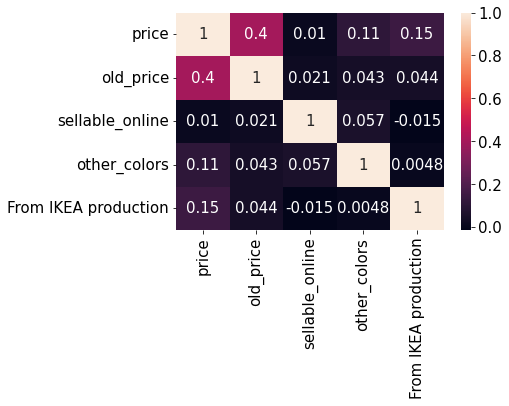

In [34]:
sns.heatmap(corr_,annot=True)
plt.show()